In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
DATA_DIRECTORY = "data"
DATA_FILE = "histogram.csv"

In [27]:
df = pd.read_csv(DATA_DIRECTORY + '/' + DATA_FILE, sep=',').drop(columns=['nb_bins', 'nb_repeat', 'rep', 'check_status']).rename(columns={"array_len": "size"});df

,kernel,threads,schedule,size,timing
0,histogram,1,none,1,3.513000e-06
1,histogram,1,none,1,2.500000e-07
2,histogram,1,none,1,1.330000e-07
3,histogram,1,none,1,1.370000e-07
4,histogram,1,none,1,1.360000e-07
...,...,...,...,...,...
23695,histogram_omp_reduce,24,guided,16384,4.727806e-03
23696,histogram_omp_reduce,24,guided,16384,4.675616e-03
23697,histogram_omp_reduce,24,guided,16384,4.733500e-03
23698,histogram_omp_reduce,24,guided,16384,4.659571e-03


In [28]:
df_ref = df[df['kernel'] == 'histogram'].drop(columns=['threads', 'schedule']);df_ref
df_ref = df_ref.groupby(['kernel','size'])['timing'].median().reset_index();df_ref

,kernel,size,timing
0,histogram,1,1.360000e-07
1,histogram,2,1.835000e-07
2,histogram,4,3.040000e-07
3,histogram,8,4.780000e-07
4,histogram,16,9.240000e-07
5,histogram,32,2.092000e-06
6,histogram,64,5.251500e-06
7,histogram,128,1.338750e-05
8,histogram,256,5.601950e-05
9,histogram,512,2.004575e-04


In [29]:
df_test = df[df['kernel'] != 'histogram'];df_test
df_test = df_test.groupby(['kernel', 'threads', 'schedule', 'size'])['timing'].median().reset_index();df_test

,kernel,threads,schedule,size,timing
0,histogram_omp_collapse,1,dynamic,1,0.000002
1,histogram_omp_collapse,1,dynamic,2,0.000002
2,histogram_omp_collapse,1,dynamic,4,0.000003
3,histogram_omp_collapse,1,dynamic,8,0.000002
4,histogram_omp_collapse,1,dynamic,16,0.000019
...,...,...,...,...,...
2335,histogram_omp_reduce,24,static,1024,0.000168
2336,histogram_omp_reduce,24,static,2048,0.000539
2337,histogram_omp_reduce,24,static,4096,0.003576
2338,histogram_omp_reduce,24,static,8192,0.002436


In [30]:
df_merged = pd.merge(df_test, df_ref[['size', 'timing']], on='size', how='left', suffixes=('', '_ref'));df_merged

,kernel,threads,schedule,size,timing,timing_ref
0,histogram_omp_collapse,1,dynamic,1,0.000002,1.360000e-07
1,histogram_omp_collapse,1,dynamic,2,0.000002,1.835000e-07
2,histogram_omp_collapse,1,dynamic,4,0.000003,3.040000e-07
3,histogram_omp_collapse,1,dynamic,8,0.000002,4.780000e-07
4,histogram_omp_collapse,1,dynamic,16,0.000019,9.240000e-07
...,...,...,...,...,...,...
2335,histogram_omp_reduce,24,static,1024,0.000168,6.843075e-04
2336,histogram_omp_reduce,24,static,2048,0.000539,2.650610e-03
2337,histogram_omp_reduce,24,static,4096,0.003576,7.465816e-03
2338,histogram_omp_reduce,24,static,8192,0.002436,2.706471e-02


In [31]:
df_merged['speedup'] = df_merged['timing_ref'] / df_merged['timing'];df_merged

,kernel,threads,schedule,size,timing,timing_ref,speedup
0,histogram_omp_collapse,1,dynamic,1,0.000002,1.360000e-07,0.080712
1,histogram_omp_collapse,1,dynamic,2,0.000002,1.835000e-07,0.104380
2,histogram_omp_collapse,1,dynamic,4,0.000003,3.040000e-07,0.112718
3,histogram_omp_collapse,1,dynamic,8,0.000002,4.780000e-07,0.203751
4,histogram_omp_collapse,1,dynamic,16,0.000019,9.240000e-07,0.049893
...,...,...,...,...,...,...,...
2335,histogram_omp_reduce,24,static,1024,0.000168,6.843075e-04,4.072168
2336,histogram_omp_reduce,24,static,2048,0.000539,2.650610e-03,4.918036
2337,histogram_omp_reduce,24,static,4096,0.003576,7.465816e-03,2.087645
2338,histogram_omp_reduce,24,static,8192,0.002436,2.706471e-02,11.110483


In [32]:
df_inner = df_merged[df_merged['kernel'] == 'histogram_omp_inner']
df_outer = df_merged[df_merged['kernel'] == 'histogram_omp_outer']
df_collapse = df_merged[df_merged['kernel'] == 'histogram_omp_collapse']
df_reduce = df_merged[df_merged['kernel'] == 'histogram_omp_reduce']

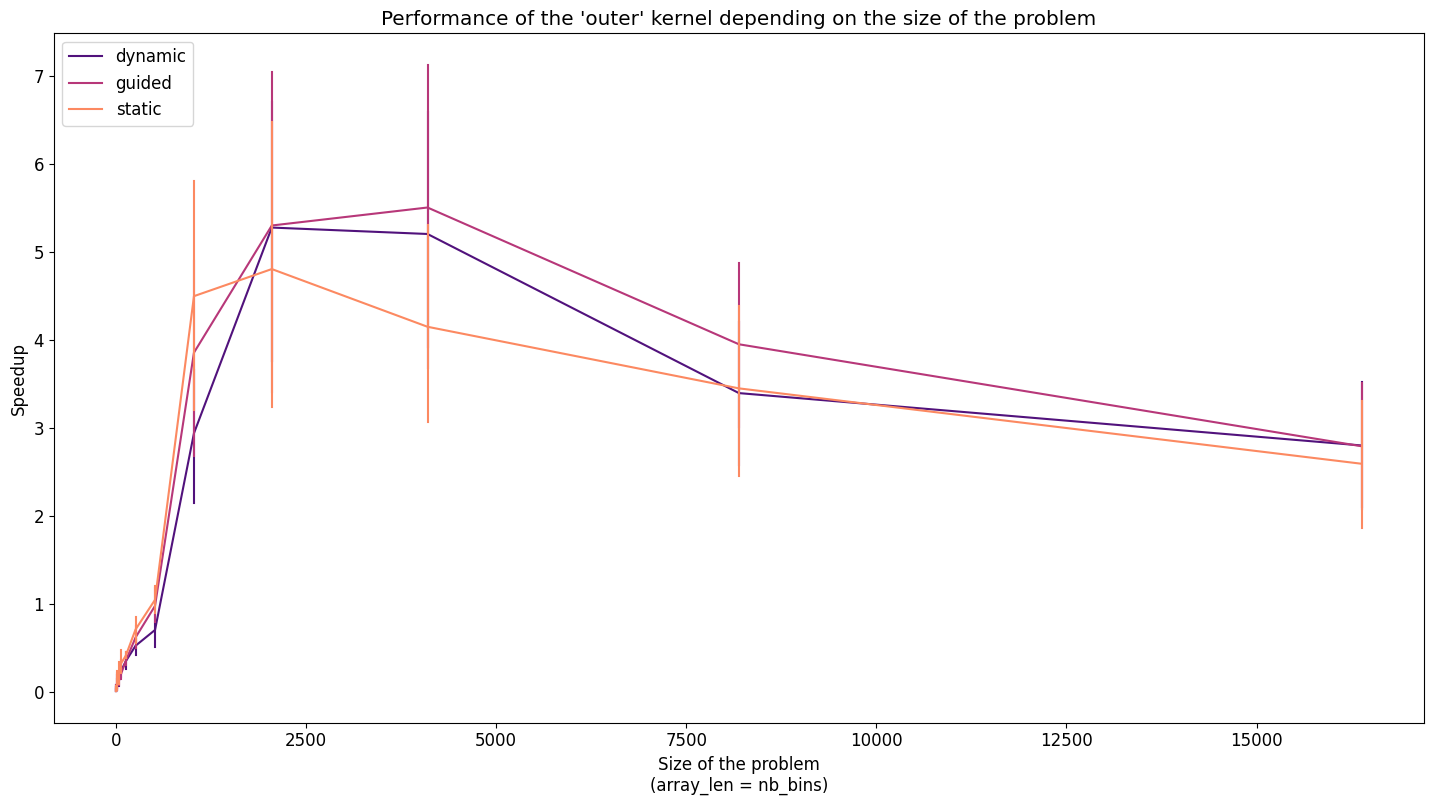

In [33]:
fig, ax = plt.subplots(figsize=(14.5,8))
plt.rcParams.update({'font.size': 12})
sns.lineplot(data=df_outer, x="size", y="speedup", hue="schedule", markers='o', err_style='bars', palette="magma")
plt.legend(loc='upper left')
plt.title("Performance of the 'outer' kernel depending on the size of the problem")
plt.tight_layout()
plt.xlabel('Size of the problem\n(array_len = nb_bins)')
plt.ylabel('Speedup')
plt.savefig("plots/histogram/schedule_outer.png", format='png')
plt.show()

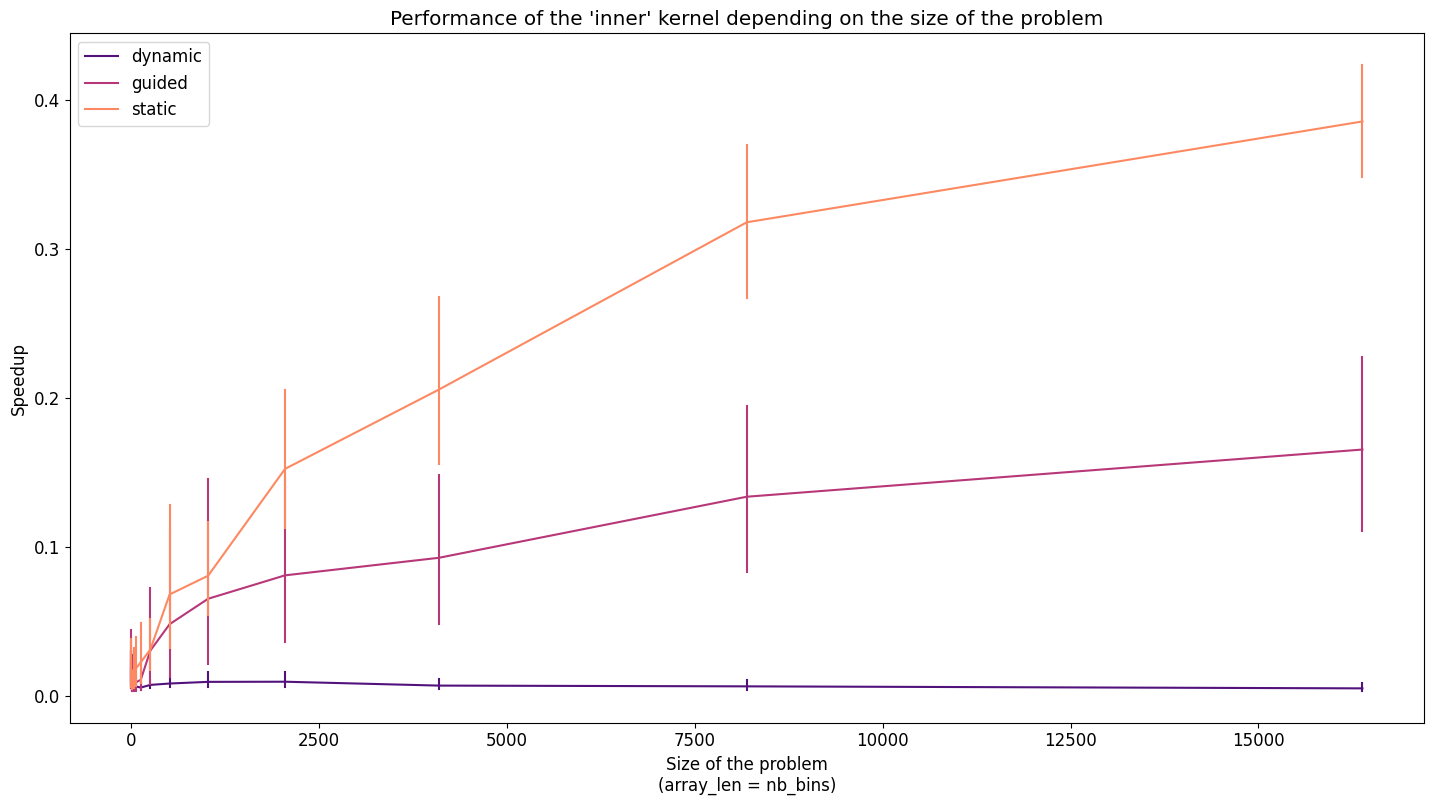

In [34]:
fig, ax = plt.subplots(figsize=(14.5,8))
plt.rcParams.update({'font.size': 12})
sns.lineplot(data=df_inner, x="size", y="speedup", hue="schedule", markers='o', err_style='bars', palette="magma")
plt.legend(loc='upper left')
plt.title("Performance of the 'inner' kernel depending on the size of the problem")
plt.tight_layout()
plt.xlabel('Size of the problem\n(array_len = nb_bins)')
plt.ylabel('Speedup')
plt.savefig("plots/histogram/schedule_inner.png", format='png')
plt.show()

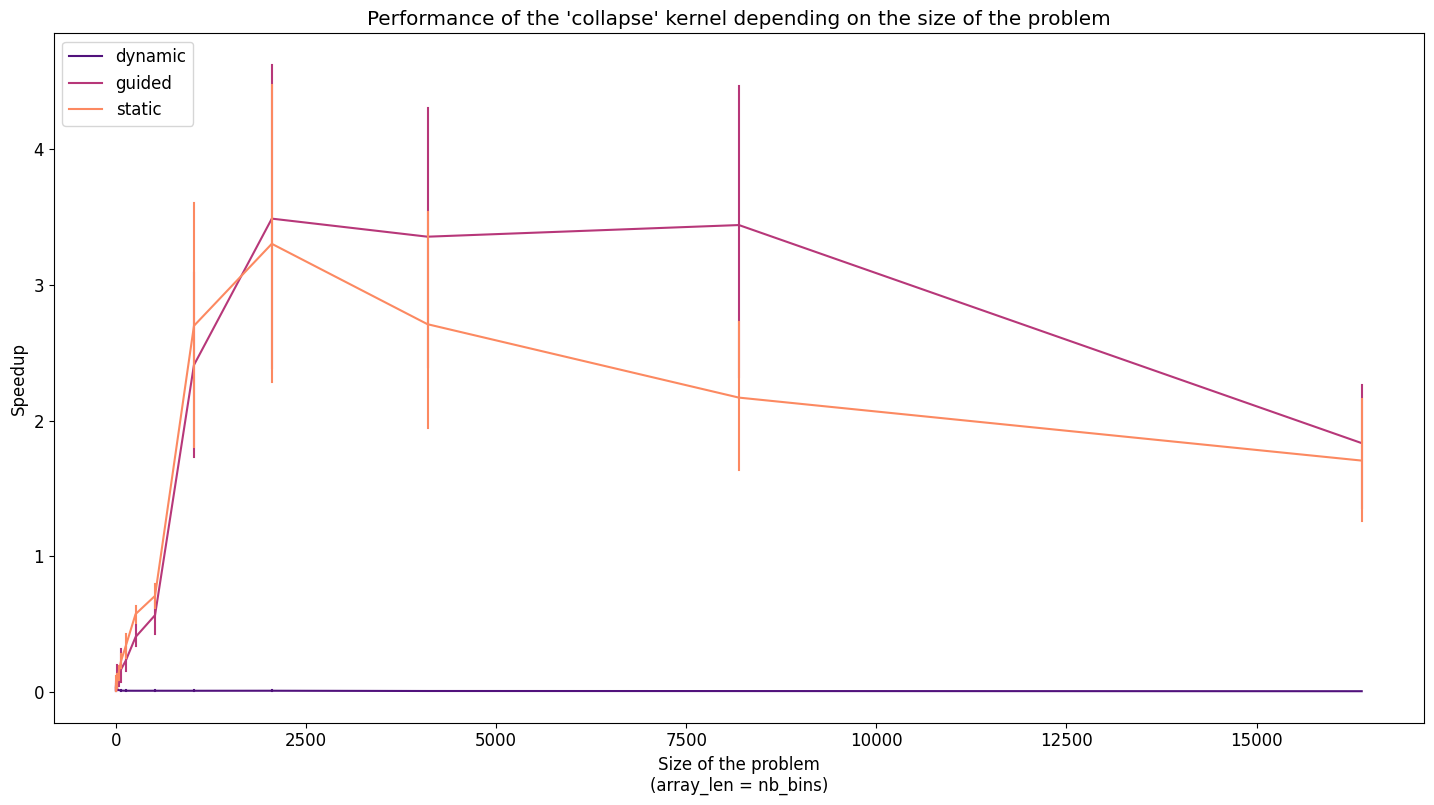

In [35]:
fig, ax = plt.subplots(figsize=(14.5,8))
plt.rcParams.update({'font.size': 12})
sns.lineplot(data=df_collapse, x="size", y="speedup", hue="schedule", markers='o', err_style='bars', palette="magma")
plt.legend(loc='upper left')
plt.title("Performance of the 'collapse' kernel depending on the size of the problem")
plt.tight_layout()
plt.xlabel('Size of the problem\n(array_len = nb_bins)')
plt.ylabel('Speedup')
plt.savefig("plots/histogram/schedule_collapse.png", format='png')
plt.show()

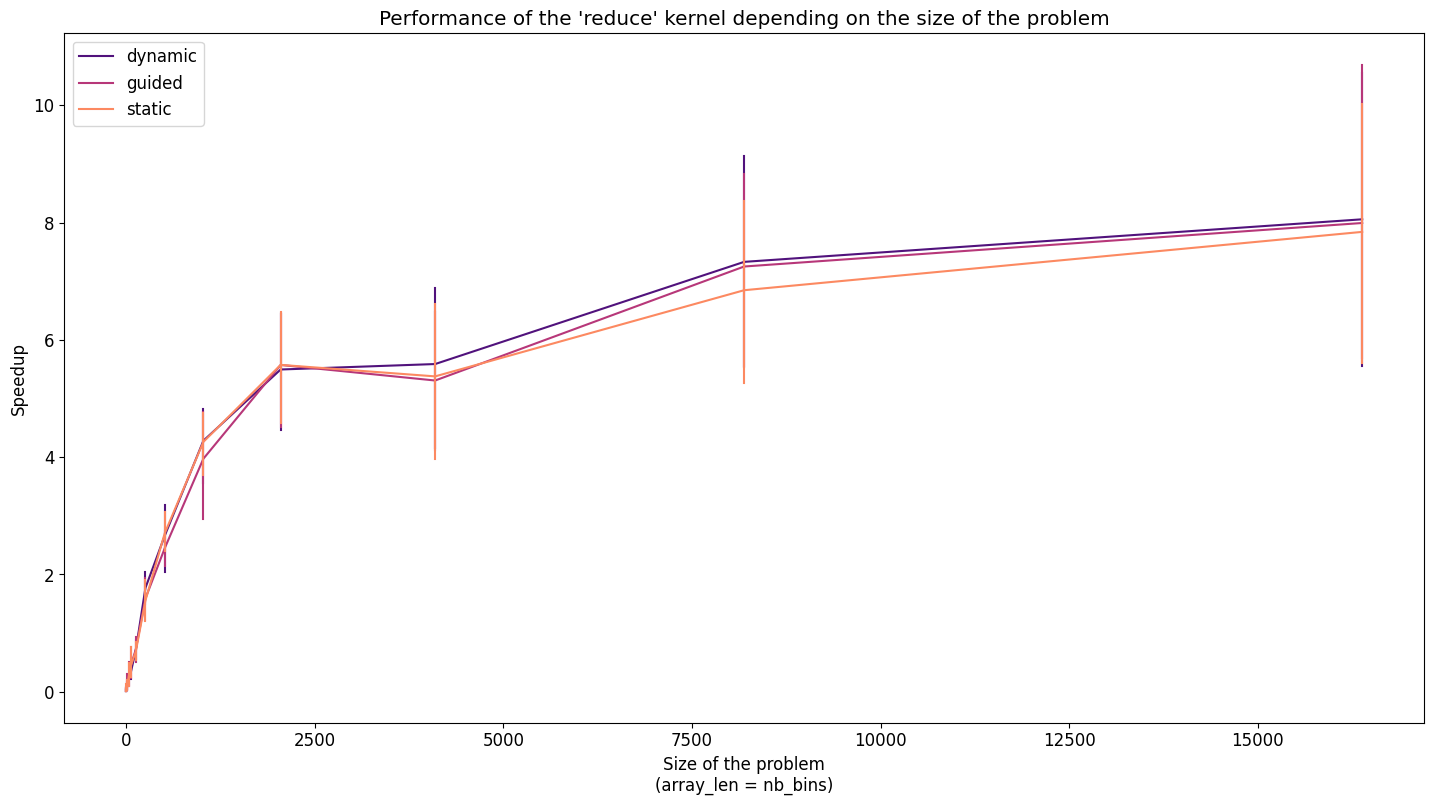

In [36]:
fig, ax = plt.subplots(figsize=(14.5,8))
plt.rcParams.update({'font.size': 12})
sns.lineplot(data=df_reduce, x="size", y="speedup", hue="schedule", markers='o', err_style='bars', palette="magma")
plt.legend(loc='upper left')
plt.title("Performance of the 'reduce' kernel depending on the size of the problem")
plt.tight_layout()
plt.xlabel('Size of the problem\n(array_len = nb_bins)')
plt.ylabel('Speedup')
plt.savefig("plots/histogram/schedule_reduce.png", format='png')
plt.show()

In [37]:
frames = [df_outer.loc[df_outer['schedule'] == 'static'],\
          df_inner.loc[df_inner['schedule'] == 'guided'],\
          df_collapse.loc[df_collapse['schedule'] == 'guided'],\
          df_reduce.loc[df_reduce['schedule'] == 'dynamic']]

df_top = pd.concat(frames)

df_top['kernel'] = df_top['kernel'].replace({'histogram_omp_outer': 'histogram_omp_outer_static'})
df_top['kernel'] = df_top['kernel'].replace({'histogram_omp_inner': 'histogram_omp_inner_guided'})
df_top['kernel'] = df_top['kernel'].replace({'histogram_omp_collapse': 'histogram_omp_collapse_guided'})
df_top['kernel'] = df_top['kernel'].replace({'histogram_omp_reduce': 'histogram_omp_reduce_dynamic'})

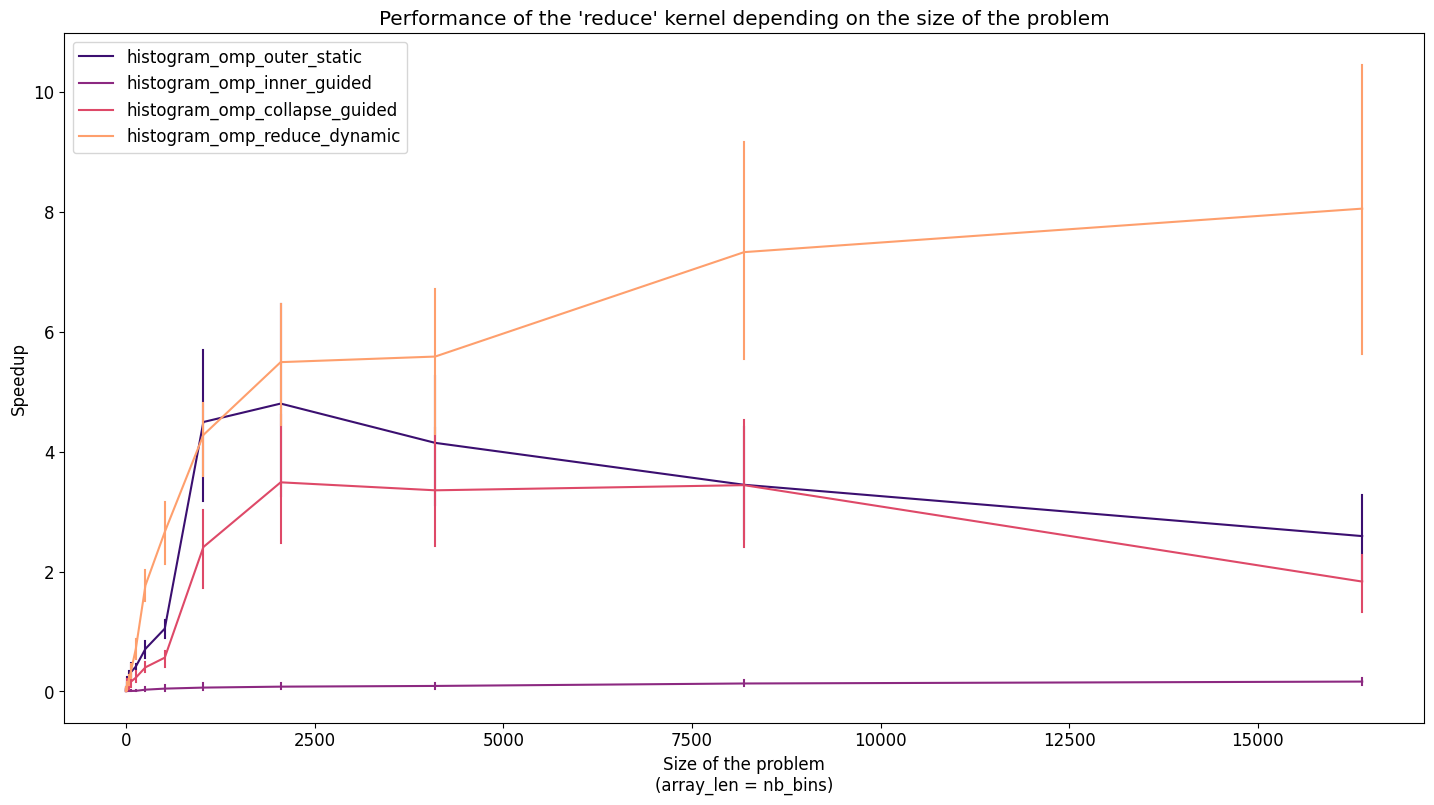

In [38]:
fig, ax = plt.subplots(figsize=(14.5,8))
plt.rcParams.update({'font.size': 12})
sns.lineplot(data=df_top, x="size", y="speedup", hue="kernel", markers='o', err_style='bars', palette="magma")
plt.legend(loc='upper left')
plt.title("Performance of the 'reduce' kernel depending on the size of the problem")
plt.tight_layout()
plt.xlabel('Size of the problem\n(array_len = nb_bins)')
plt.ylabel('Speedup')
plt.savefig("plots/histogram/kernel_top.png", format='png')
plt.show()

In [39]:
df_reduce_dynamic = df_reduce.loc[df_reduce['schedule'] == 'dynamic'].replace({'histogram_omp_reduce': 'histogram_omp_reduce_dynamic'});df_reduce_dynamic

,kernel,threads,schedule,size,timing,timing_ref,speedup
1755,histogram_omp_reduce_dynamic,1,dynamic,1,0.000002,1.360000e-07,0.090066
1756,histogram_omp_reduce_dynamic,1,dynamic,2,0.000001,1.835000e-07,0.128232
1757,histogram_omp_reduce_dynamic,1,dynamic,4,0.000002,3.040000e-07,0.196636
1758,histogram_omp_reduce_dynamic,1,dynamic,8,0.000002,4.780000e-07,0.274476
1759,histogram_omp_reduce_dynamic,1,dynamic,16,0.000002,9.240000e-07,0.405886
...,...,...,...,...,...,...,...
2305,histogram_omp_reduce_dynamic,24,dynamic,1024,0.000170,6.843075e-04,4.019002
2306,histogram_omp_reduce_dynamic,24,dynamic,2048,0.000483,2.650610e-03,5.491756
2307,histogram_omp_reduce_dynamic,24,dynamic,4096,0.001129,7.465816e-03,6.610494
2308,histogram_omp_reduce_dynamic,24,dynamic,8192,0.002146,2.706471e-02,12.612826


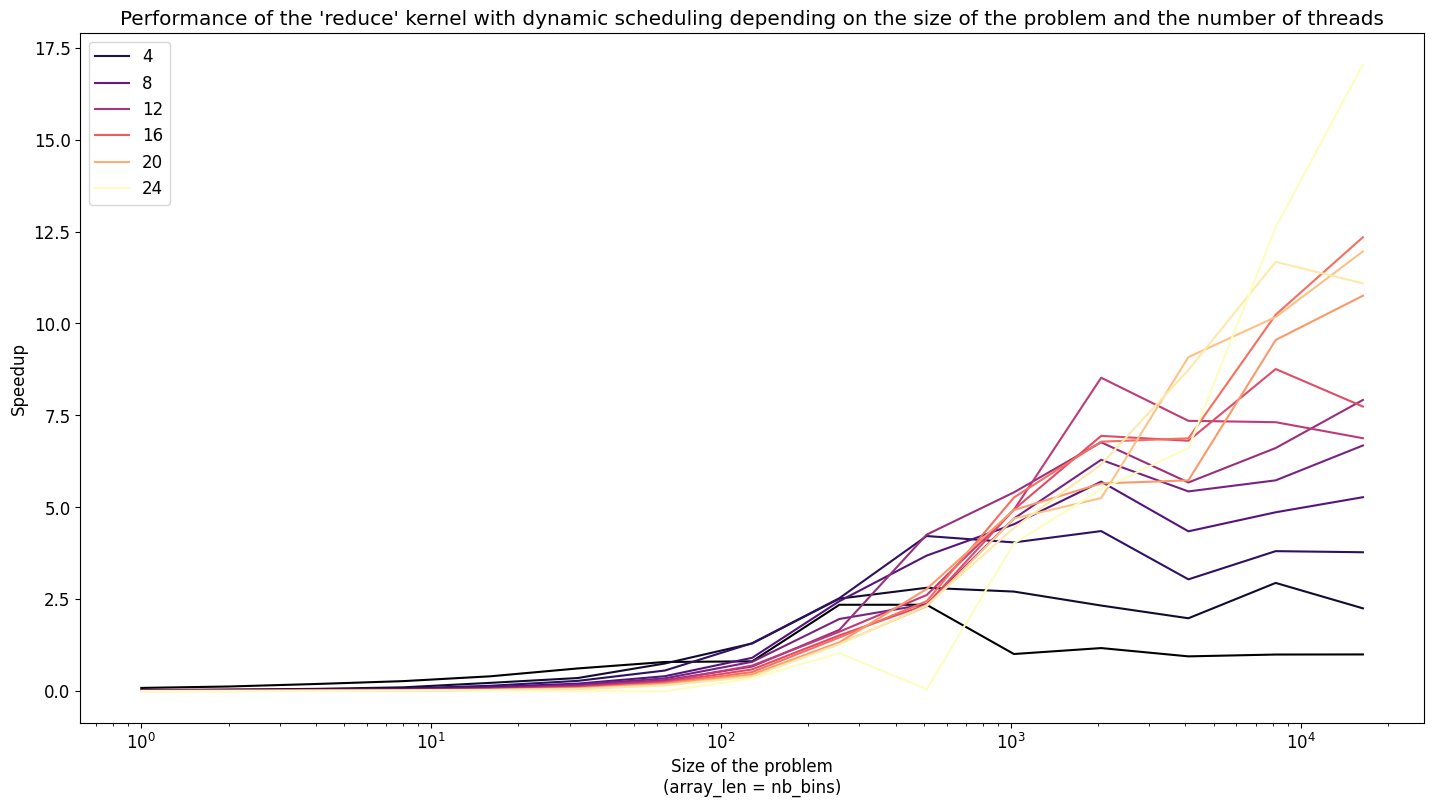

In [40]:
fig, ax = plt.subplots(figsize=(14.5,8))
plt.rcParams.update({'font.size': 12})
sns.lineplot(data=df_reduce_dynamic, x="size", y="speedup", hue="threads", markers='o', err_style='bars', palette="magma")
plt.legend(loc='upper left')
plt.title("Performance of the 'reduce' kernel with dynamic scheduling depending on the size of the problem and the number of threads")
plt.tight_layout()
plt.xscale('log')
plt.xlabel('Size of the problem\n(array_len = nb_bins)')
plt.ylabel('Speedup')
plt.savefig("plots/histogram/top_threads.png", format='png')
plt.show()